In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data 
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()


In [ ]:
#Read the study results
study_results = pd.read_csv(study_results_path)
study_results.head()

In [ ]:
combined_data = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")
combined_data.head()

In [ ]:
# Checking the number of mice.
num_mice = combined_df["Mouse ID"].nunique()
num_mice

In [ ]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_ID = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ID

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
duplicate_mouse_df

In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanup_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mouse_ID)==False]
cleanup_df.head()

In [ ]:
# Checking the number of mice in the clean DataFrame.

cleanup_mice = cleanup_df["Mouse ID"].nunique()

cleanup_mice

In [ ]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = cleanup_df['Tumor Volume (mm3)'].groupby(cleanup_df['Drug Regimen']).mean()
median = cleanup_df['Tumor Volume (mm3)'].groupby(cleanup_df['Drug Regimen']).median()
var = cleanup_df['Tumor Volume (mm3)'].groupby(cleanup_df['Drug Regimen']).var()
std = cleanup_df['Tumor Volume (mm3)'].groupby(cleanup_df['Drug Regimen']).std()
sem = cleanup_df['Tumor Volume (mm3)'].groupby(cleanup_df['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_stat

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen 
#stat = ['mean', 'median', 'var', 'std', 'sem']
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  cleanup_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

In [ ]:
mice_count = cleanup_df["Drug Regimen"].value_counts()
mice_count

Text(0.5, 1.0, '# of Mice per Treatment')

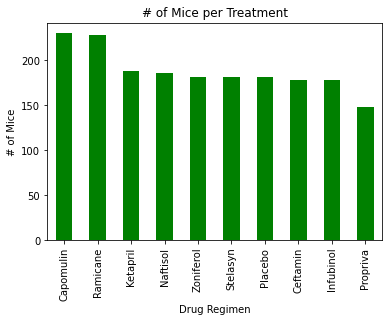

In [62]:
# Create a Pandas bar plot based off of the group series from before and label the title

plot_pandas = mice_count.plot.bar(color='g')  

# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice")
plt.title("# of Mice per Treatment")

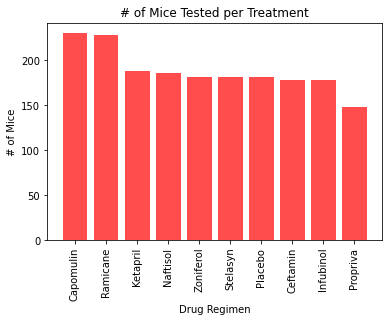

In [61]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='r', alpha=0.7, align='center')

# Set the xlabel and ylabel, title using class methods
plt.title("# of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice")
plt.xticks(rotation="vertical")

plt.show()

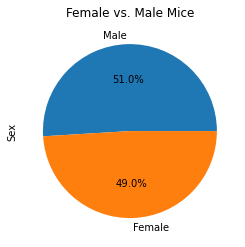

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_data = cleanup_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

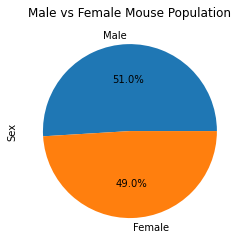

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()